<a href="https://www.kaggle.com/code/nomanrafi28/covid-19?scriptVersionId=204875277" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('/kaggle/input/covid19-dataset/covid_data.csv')

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [4]:
df.shape

(429435, 67)

In [5]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
df.describe

<bound method NDFrame.describe of        iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  t

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [8]:
df.shape

(429435, 67)

In [9]:
df.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [10]:
missing_threshold = 0.5 * len(df)
df = df.dropna(thresh=missing_threshold, axis=1)

In [11]:
df.shape

(429435, 29)

In [12]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
df.loc[:, numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [13]:
df.shape

(429435, 29)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   iso_code                         429435 non-null  object 
 1   continent                        402910 non-null  object 
 2   location                         429435 non-null  object 
 3   date                             429435 non-null  object 
 4   total_cases                      429435 non-null  float64
 5   new_cases                        429435 non-null  float64
 6   new_cases_smoothed               429435 non-null  float64
 7   total_deaths                     429435 non-null  float64
 8   new_deaths                       429435 non-null  float64
 9   new_deaths_smoothed              429435 non-null  float64
 10  total_cases_per_million          429435 non-null  float64
 11  new_cases_per_million            429435 non-null  float64
 12  ne

In [15]:
df.shape

(429435, 29)

In [16]:
df.isnull().sum()

iso_code                               0
continent                          26525
location                               0
date                                   0
total_cases                            0
new_cases                              0
new_cases_smoothed                     0
total_deaths                           0
new_deaths                             0
new_deaths_smoothed                    0
total_cases_per_million                0
new_cases_per_million                  0
new_cases_smoothed_per_million         0
total_deaths_per_million               0
new_deaths_per_million                 0
new_deaths_smoothed_per_million        0
population_density                     0
median_age                             0
aged_65_older                          0
aged_70_older                          0
gdp_per_capita                         0
cardiovasc_death_rate                  0
diabetes_prevalence                    0
female_smokers                         0
male_smokers    

In [17]:
categorical_cols = df.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
df.loc[:, categorical_cols] = imputer.fit_transform(df[categorical_cols])

In [18]:
# Make an explicit copy of df to avoid SettingWithCopyWarning
df = df.copy()

# Check if 'date' column exists in the DataFrame
if 'date' in df.columns:
    # Convert 'date' column to datetime, setting invalid parsing as NaT (Not a Time)
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

    # Drop rows where 'date' could not be parsed
    df = df.dropna(subset=['date']).copy()

    # Create new columns for month, day, and day_of_week
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek

    # Drop the original 'date' column if no longer needed
    df = df.drop(columns=['date'])
else:
    print("The 'date' column is not present in the dataset.")

# Preview the processed dataset
print(df.head())


  iso_code continent     location  total_cases  new_cases  new_cases_smoothed  \
0      AFG      Asia  Afghanistan          0.0        0.0                12.0   
1      AFG      Asia  Afghanistan          0.0        0.0                12.0   
2      AFG      Asia  Afghanistan          0.0        0.0                12.0   
3      AFG      Asia  Afghanistan          0.0        0.0                12.0   
4      AFG      Asia  Afghanistan          0.0        0.0                12.0   

   total_deaths  new_deaths  new_deaths_smoothed  total_cases_per_million  \
0           0.0         0.0                  0.0                      0.0   
1           0.0         0.0                  0.0                      0.0   
2           0.0         0.0                  0.0                      0.0   
3           0.0         0.0                  0.0                      0.0   
4           0.0         0.0                  0.0                      0.0   

   ...  diabetes_prevalence  female_smokers  male_

In [19]:
df

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population,month,day,day_of_week
0,AFG,Asia,Afghanistan,0.0,0.0,12.0,0.0,0.0,0.0,0.00,...,9.59,6.3,33.1,0.5,64.83,0.511,41128772,1,5,6
1,AFG,Asia,Afghanistan,0.0,0.0,12.0,0.0,0.0,0.0,0.00,...,9.59,6.3,33.1,0.5,64.83,0.511,41128772,1,6,0
2,AFG,Asia,Afghanistan,0.0,0.0,12.0,0.0,0.0,0.0,0.00,...,9.59,6.3,33.1,0.5,64.83,0.511,41128772,1,7,1
3,AFG,Asia,Afghanistan,0.0,0.0,12.0,0.0,0.0,0.0,0.00,...,9.59,6.3,33.1,0.5,64.83,0.511,41128772,1,8,2
4,AFG,Asia,Afghanistan,0.0,0.0,12.0,0.0,0.0,0.0,0.00,...,9.59,6.3,33.1,0.5,64.83,0.511,41128772,1,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,...,1.82,1.6,30.7,1.7,61.49,0.571,16320539,7,31,2
429431,ZWE,Africa,Zimbabwe,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,...,1.82,1.6,30.7,1.7,61.49,0.571,16320539,8,1,3
429432,ZWE,Africa,Zimbabwe,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,...,1.82,1.6,30.7,1.7,61.49,0.571,16320539,8,2,4
429433,ZWE,Africa,Zimbabwe,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,...,1.82,1.6,30.7,1.7,61.49,0.571,16320539,8,3,5


In [20]:
df.shape

(429435, 31)

In [21]:
df.isnull().sum()

iso_code                           0
continent                          0
location                           0
total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
cardiovasc_death_rate              0
diabetes_prevalence                0
female_smokers                     0
male_smokers                       0
hospital_beds_per_thousand         0
life_expectancy                    0
human_development_index            0
p

In [22]:
label_encoder = LabelEncoder()
for col in ['continent','location','iso_code']:  # Specify categorical columns here
    df[col] = label_encoder.fit_transform(df[col])

In [23]:
df

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population,month,day,day_of_week
0,1,1,0,0.0,0.0,12.0,0.0,0.0,0.0,0.00,...,9.59,6.3,33.1,0.5,64.83,0.511,41128772,1,5,6
1,1,1,0,0.0,0.0,12.0,0.0,0.0,0.0,0.00,...,9.59,6.3,33.1,0.5,64.83,0.511,41128772,1,6,0
2,1,1,0,0.0,0.0,12.0,0.0,0.0,0.0,0.00,...,9.59,6.3,33.1,0.5,64.83,0.511,41128772,1,7,1
3,1,1,0,0.0,0.0,12.0,0.0,0.0,0.0,0.00,...,9.59,6.3,33.1,0.5,64.83,0.511,41128772,1,8,2
4,1,1,0,0.0,0.0,12.0,0.0,0.0,0.0,0.00,...,9.59,6.3,33.1,0.5,64.83,0.511,41128772,1,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,254,0,254,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,...,1.82,1.6,30.7,1.7,61.49,0.571,16320539,7,31,2
429431,254,0,254,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,...,1.82,1.6,30.7,1.7,61.49,0.571,16320539,8,1,3
429432,254,0,254,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,...,1.82,1.6,30.7,1.7,61.49,0.571,16320539,8,2,4
429433,254,0,254,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,...,1.82,1.6,30.7,1.7,61.49,0.571,16320539,8,3,5


In [24]:
df.isnull().sum()

iso_code                           0
continent                          0
location                           0
total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
cardiovasc_death_rate              0
diabetes_prevalence                0
female_smokers                     0
male_smokers                       0
hospital_beds_per_thousand         0
life_expectancy                    0
human_development_index            0
p

In [25]:
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

In [26]:
df

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population,month,day,day_of_week
0,-1.724083,-0.493114,-1.722164,-0.161052,-0.034116,-0.090438,-0.180315,-0.051344,-0.136917,-0.680485,...,0.290882,-0.304350,0.000124,-1.139083,-1.275173,-1.677525,-0.158994,-1.539720,-1.219059,1.498643
1,-1.724083,-0.493114,-1.722164,-0.161052,-0.034116,-0.090438,-0.180315,-0.051344,-0.136917,-0.680485,...,0.290882,-0.304350,0.000124,-1.139083,-1.275173,-1.677525,-0.158994,-1.539720,-1.105410,-1.500286
2,-1.724083,-0.493114,-1.722164,-0.161052,-0.034116,-0.090438,-0.180315,-0.051344,-0.136917,-0.680485,...,0.290882,-0.304350,0.000124,-1.139083,-1.275173,-1.677525,-0.158994,-1.539720,-0.991760,-1.000465
3,-1.724083,-0.493114,-1.722164,-0.161052,-0.034116,-0.090438,-0.180315,-0.051344,-0.136917,-0.680485,...,0.290882,-0.304350,0.000124,-1.139083,-1.275173,-1.677525,-0.158994,-1.539720,-0.878111,-0.500643
4,-1.724083,-0.493114,-1.722164,-0.161052,-0.034116,-0.090438,-0.180315,-0.051344,-0.136917,-0.680485,...,0.290882,-0.304350,0.000124,-1.139083,-1.275173,-1.677525,-0.158994,-1.539720,-0.764461,-0.000822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,1.716610,-1.153479,1.747799,-0.154980,-0.034116,-0.090580,-0.167038,-0.051344,-0.136917,-0.576697,...,-1.450785,-0.860042,-0.229785,-0.572099,-1.748670,-1.210956,-0.194560,0.227585,1.735831,-0.500643
429431,1.716610,-1.153479,1.747799,-0.154980,-0.034116,-0.090580,-0.167038,-0.051344,-0.136917,-0.576697,...,-1.450785,-0.860042,-0.229785,-0.572099,-1.748670,-1.210956,-0.194560,0.522135,-1.673658,-0.000822
429432,1.716610,-1.153479,1.747799,-0.154980,-0.034116,-0.090580,-0.167038,-0.051344,-0.136917,-0.576697,...,-1.450785,-0.860042,-0.229785,-0.572099,-1.748670,-1.210956,-0.194560,0.522135,-1.560008,0.499000
429433,1.716610,-1.153479,1.747799,-0.154980,-0.034116,-0.090580,-0.167038,-0.051344,-0.136917,-0.576697,...,-1.450785,-0.860042,-0.229785,-0.572099,-1.748670,-1.210956,-0.194560,0.522135,-1.446359,0.998821


In [27]:
df 

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population,month,day,day_of_week
0,-1.724083,-0.493114,-1.722164,-0.161052,-0.034116,-0.090438,-0.180315,-0.051344,-0.136917,-0.680485,...,0.290882,-0.304350,0.000124,-1.139083,-1.275173,-1.677525,-0.158994,-1.539720,-1.219059,1.498643
1,-1.724083,-0.493114,-1.722164,-0.161052,-0.034116,-0.090438,-0.180315,-0.051344,-0.136917,-0.680485,...,0.290882,-0.304350,0.000124,-1.139083,-1.275173,-1.677525,-0.158994,-1.539720,-1.105410,-1.500286
2,-1.724083,-0.493114,-1.722164,-0.161052,-0.034116,-0.090438,-0.180315,-0.051344,-0.136917,-0.680485,...,0.290882,-0.304350,0.000124,-1.139083,-1.275173,-1.677525,-0.158994,-1.539720,-0.991760,-1.000465
3,-1.724083,-0.493114,-1.722164,-0.161052,-0.034116,-0.090438,-0.180315,-0.051344,-0.136917,-0.680485,...,0.290882,-0.304350,0.000124,-1.139083,-1.275173,-1.677525,-0.158994,-1.539720,-0.878111,-0.500643
4,-1.724083,-0.493114,-1.722164,-0.161052,-0.034116,-0.090438,-0.180315,-0.051344,-0.136917,-0.680485,...,0.290882,-0.304350,0.000124,-1.139083,-1.275173,-1.677525,-0.158994,-1.539720,-0.764461,-0.000822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,1.716610,-1.153479,1.747799,-0.154980,-0.034116,-0.090580,-0.167038,-0.051344,-0.136917,-0.576697,...,-1.450785,-0.860042,-0.229785,-0.572099,-1.748670,-1.210956,-0.194560,0.227585,1.735831,-0.500643
429431,1.716610,-1.153479,1.747799,-0.154980,-0.034116,-0.090580,-0.167038,-0.051344,-0.136917,-0.576697,...,-1.450785,-0.860042,-0.229785,-0.572099,-1.748670,-1.210956,-0.194560,0.522135,-1.673658,-0.000822
429432,1.716610,-1.153479,1.747799,-0.154980,-0.034116,-0.090580,-0.167038,-0.051344,-0.136917,-0.576697,...,-1.450785,-0.860042,-0.229785,-0.572099,-1.748670,-1.210956,-0.194560,0.522135,-1.560008,0.499000
429433,1.716610,-1.153479,1.747799,-0.154980,-0.034116,-0.090580,-0.167038,-0.051344,-0.136917,-0.576697,...,-1.450785,-0.860042,-0.229785,-0.572099,-1.748670,-1.210956,-0.194560,0.522135,-1.446359,0.998821


In [28]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [29]:
df.duplicated().sum()

0

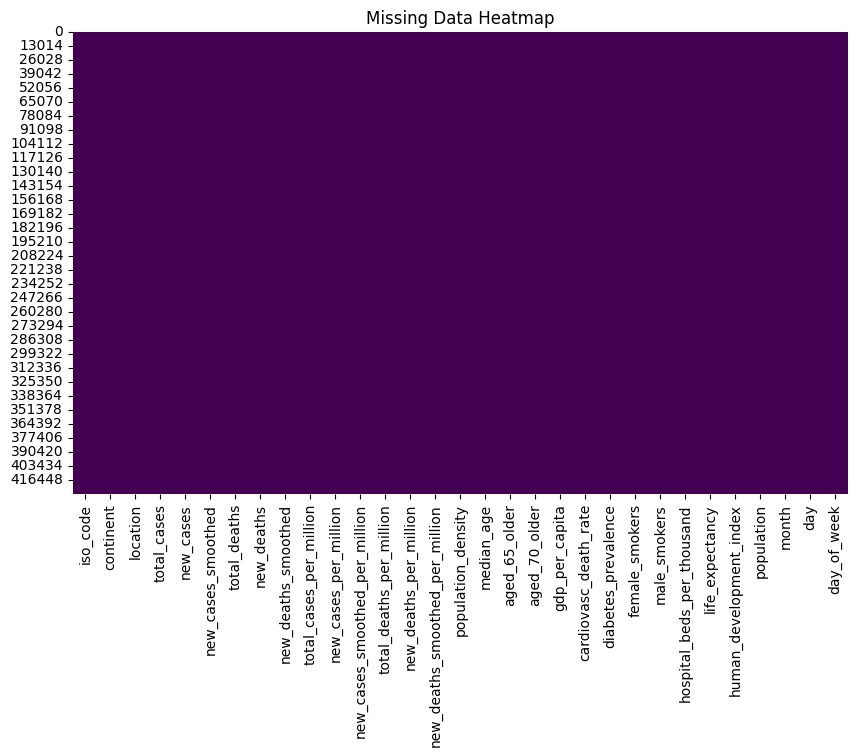

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [31]:
# Plot total cases over time
# plt.figure(figsize=(12, 6))
# df.groupby('date')['total_cases'].sum().plot()
# plt.title('Global Total COVID-19 Cases Over Time')
# plt.xlabel('Date')
# plt.ylabel('Total Cases')
# plt.show()

In [32]:
# Plot total deaths over time
# plt.figure(figsize=(12, 6))
# df.groupby('date')['total_deaths'].sum().plot(color='red')
# plt.title('Global Total COVID-19 Deaths Over Time')
# plt.xlabel('Date')
# plt.ylabel('Total Deaths')
# plt.show()

In [33]:
# df['date'] = pd.to_datetime(df['date'])
# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month

In [34]:
# Testing Capacity vs Cases
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='total_cases', y='new_cases', hue='location')
# plt.title('Testing Capacity vs New COVID-19 Cases')
# plt.xlabel('Total Tests')
# plt.ylabel('New Cases')
# plt.legend(loc='upper right')
# plt.show()